In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from collections import deque
from sklearn import preprocessing
import random

In [2]:
main_dataframe = pd.DataFrame()

In [3]:
currencies = ['BCH-USD', 'BTC-USD', 'ETH-USD', 'LTC-USD']
for c in currencies:
    dataset = 'data/' + c + '.csv'
    df = pd.read_csv(dataset, names=['time', 'low', 'high', 'open', 'close', 'volume'])
    df.rename(columns={'close': c + '_close', 'volume': c + '_volume'}, inplace=True)
    df.set_index('time', inplace=True)
    df = df[[c + '_close', c + '_volume']]
    if len(main_dataframe) == 0:
        main_dataframe = df
    else:
        main_dataframe = main_dataframe.join(df)

In [4]:
main_dataframe.head()

,BCH-USD_close,BCH-USD_volume,BTC-USD_close,BTC-USD_volume,ETH-USD_close,ETH-USD_volume,LTC-USD_close,LTC-USD_volume
time,,,,,,,,
1528968660,871.719971,5.675361,6489.549805,0.587100,NaN,NaN,96.580002,9.647200
1528968720,870.859985,26.856577,6487.379883,7.706374,486.01001,26.019083,96.660004,314.387024
1528968780,870.099976,1.124300,6479.410156,3.088252,486.00000,8.449400,96.570000,77.129799
1528968840,870.789978,1.749862,6479.410156,1.404100,485.75000,26.994646,96.500000,7.216067
1528968900,870.000000,1.680500,6479.979980,0.753000,486.00000,77.355759,96.389999,524.539978


In [5]:
main_dataframe.isnull().sum()

BCH-USD_close        0
BCH-USD_volume       0
BTC-USD_close     5122
BTC-USD_volume    5122
ETH-USD_close      195
ETH-USD_volume     195
LTC-USD_close      836
LTC-USD_volume     836
dtype: int64

In [6]:
main_dataframe.fillna(method='ffill', inplace=True)

C:\Users\salim\AppData\Local\Temp\ipykernel_15760\2786368028.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  main_dataframe.fillna(method='ffill', inplace=True)


In [7]:
main_dataframe.isnull().sum()

BCH-USD_close     0
BCH-USD_volume    0
BTC-USD_close     0
BTC-USD_volume    0
ETH-USD_close     1
ETH-USD_volume    1
LTC-USD_close     0
LTC-USD_volume    0
dtype: int64

In [8]:
main_dataframe.head()

,BCH-USD_close,BCH-USD_volume,BTC-USD_close,BTC-USD_volume,ETH-USD_close,ETH-USD_volume,LTC-USD_close,LTC-USD_volume
time,,,,,,,,
1528968660,871.719971,5.675361,6489.549805,0.587100,NaN,NaN,96.580002,9.647200
1528968720,870.859985,26.856577,6487.379883,7.706374,486.01001,26.019083,96.660004,314.387024
1528968780,870.099976,1.124300,6479.410156,3.088252,486.00000,8.449400,96.570000,77.129799
1528968840,870.789978,1.749862,6479.410156,1.404100,485.75000,26.994646,96.500000,7.216067
1528968900,870.000000,1.680500,6479.979980,0.753000,486.00000,77.355759,96.389999,524.539978


In [9]:
main_dataframe.fillna(method='bfill', inplace=True)

C:\Users\salim\AppData\Local\Temp\ipykernel_15760\3432109870.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  main_dataframe.fillna(method='bfill', inplace=True)


In [10]:
main_dataframe.head()

,BCH-USD_close,BCH-USD_volume,BTC-USD_close,BTC-USD_volume,ETH-USD_close,ETH-USD_volume,LTC-USD_close,LTC-USD_volume
time,,,,,,,,
1528968660,871.719971,5.675361,6489.549805,0.587100,486.01001,26.019083,96.580002,9.647200
1528968720,870.859985,26.856577,6487.379883,7.706374,486.01001,26.019083,96.660004,314.387024
1528968780,870.099976,1.124300,6479.410156,3.088252,486.00000,8.449400,96.570000,77.129799
1528968840,870.789978,1.749862,6479.410156,1.404100,485.75000,26.994646,96.500000,7.216067
1528968900,870.000000,1.680500,6479.979980,0.753000,486.00000,77.355759,96.389999,524.539978


In [11]:
main_dataframe.isnull().sum()

BCH-USD_close     0
BCH-USD_volume    0
BTC-USD_close     0
BTC-USD_volume    0
ETH-USD_close     0
ETH-USD_volume    0
LTC-USD_close     0
LTC-USD_volume    0
dtype: int64

In [12]:
main_dataframe['future'] = main_dataframe['LTC-USD_close'].shift(-3)

In [13]:
main_dataframe.head()

,BCH-USD_close,BCH-USD_volume,BTC-USD_close,BTC-USD_volume,ETH-USD_close,ETH-USD_volume,LTC-USD_close,LTC-USD_volume,future
time,,,,,,,,,
1528968660,871.719971,5.675361,6489.549805,0.587100,486.01001,26.019083,96.580002,9.647200,96.500000
1528968720,870.859985,26.856577,6487.379883,7.706374,486.01001,26.019083,96.660004,314.387024,96.389999
1528968780,870.099976,1.124300,6479.410156,3.088252,486.00000,8.449400,96.570000,77.129799,96.519997
1528968840,870.789978,1.749862,6479.410156,1.404100,485.75000,26.994646,96.500000,7.216067,96.440002
1528968900,870.000000,1.680500,6479.979980,0.753000,486.00000,77.355759,96.389999,524.539978,96.470001


In [14]:
def compare(current, future):
    if future > current:
        return 1
    else:
        return 0
main_dataframe['target'] = list(map(compare, main_dataframe['LTC-USD_close'], main_dataframe['future']))

In [15]:
main_dataframe.head()

,BCH-USD_close,BCH-USD_volume,BTC-USD_close,BTC-USD_volume,ETH-USD_close,ETH-USD_volume,LTC-USD_close,LTC-USD_volume,future,target
time,,,,,,,,,,
1528968660,871.719971,5.675361,6489.549805,0.587100,486.01001,26.019083,96.580002,9.647200,96.500000,0
1528968720,870.859985,26.856577,6487.379883,7.706374,486.01001,26.019083,96.660004,314.387024,96.389999,0
1528968780,870.099976,1.124300,6479.410156,3.088252,486.00000,8.449400,96.570000,77.129799,96.519997,0
1528968840,870.789978,1.749862,6479.410156,1.404100,485.75000,26.994646,96.500000,7.216067,96.440002,0
1528968900,870.000000,1.680500,6479.979980,0.753000,486.00000,77.355759,96.389999,524.539978,96.470001,1


In [16]:
times = sorted(main_dataframe.index.values)

In [17]:
len(times)

92225

In [18]:
int(0.1 * len(times))

9222

In [19]:
last_10pct = sorted(main_dataframe.index.values)[-int(0.1 * len(times))]

In [20]:
last_10pct

np.int64(1534556340)

In [21]:
main_dataframe_test = main_dataframe[(main_dataframe.index >= last_10pct)]
main_dataframe_train = main_dataframe[(main_dataframe.index < last_10pct)]

In [22]:
len(main_dataframe_test)

9222

In [23]:
len(main_dataframe_train)

83003

In [24]:
main_dataframe['BTC-USD_close']

time
1528968660    6489.549805
1528968720    6487.379883
1528968780    6479.410156
1528968840    6479.410156
1528968900    6479.979980
                 ...     
1535215020    6714.520020
1535215080    6714.520020
1535215140    6715.000000
1535215200    6715.000000
1535215260    6715.000000
Name: BTC-USD_close, Length: 92225, dtype: float64

In [25]:
main_dataframe['BTC-USD_close'].pct_change()

time
1528968660         NaN
1528968720   -0.000334
1528968780   -0.001228
1528968840    0.000000
1528968900    0.000088
                ...   
1535215020    0.000206
1535215080    0.000000
1535215140    0.000071
1535215200    0.000000
1535215260    0.000000
Name: BTC-USD_close, Length: 92225, dtype: float64

In [26]:
import numpy as np
import random
from collections import deque
from sklearn import preprocessing

def preprocess_main_dataframe(df, sequence_length=30, shuffle_data=False):
    # حذف ستون آینده
    df = df.drop('future', axis=1)

    # نرمال‌سازی و درصد تغییرات
    for col in df.columns:
        if col != 'target':
            df[col] = df[col].pct_change()
    df.dropna(inplace=True)
    for col in df.columns:
        if col != 'target':
            df[col] = preprocessing.scale(df[col].values)

    # ایجاد توالی‌ها
    sequences = []
    prev_days = deque(maxlen=sequence_length)
    for row in df.values:
        prev_days.append([n for n in row[:-1]])  # همه ستون‌ها به جز target
        if len(prev_days) == sequence_length:
            sequences.append([np.array(prev_days), row[-1]])

    # بالانس کلاس‌ها در صورت درخواست (برای train)
    if shuffle_data:  # فقط هنگام آموزش
        buys = [s for s in sequences if s[1] == 1]
        sells = [s for s in sequences if s[1] == 0]
        lower = min(len(buys), len(sells))
        buys = buys[:lower]
        sells = sells[:lower]
        sequences = buys + sells
        random.shuffle(sequences)

    # جدا کردن X و y
    X, y = [], []
    for seq, target in sequences:
        X.append(seq)
        y.append(target)

    return np.array(X), np.array(y)



In [27]:
X, y = preprocess_main_dataframe(main_dataframe, sequence_length=30, shuffle_data=False)


In [28]:
# تقسیم train/test بر اساس زمان
train_size = int(len(X) * 0.8)
train_X, train_y = X[:train_size], y[:train_size]
test_X, test_y = X[train_size:], y[train_size:]

In [29]:
# 6️⃣ بالانس کلاس‌ها فقط روی train
# =======================
buys = [s for s, t in zip(train_X, train_y) if t == 1]
sells = [s for s, t in zip(train_X, train_y) if t == 0]
lower = min(len(buys), len(sells))
train_X = np.array(buys[:lower] + sells[:lower])
train_y = np.array([1]*lower + [0]*lower)


In [30]:
train_X.shape

(62472, 30, 8)

In [31]:
train_y.shape

(62472,)

In [32]:
np.unique(train_y, return_counts=True)

(array([0, 1]), array([31236, 31236]))

In [33]:
test_X.shape

(18439, 30, 8)

In [34]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization, GRU, Input
from tensorflow.keras.callbacks import EarlyStopping


In [35]:
model = Sequential()
model.add(Input(shape=(train_X.shape[1:])))
model.add(GRU(128, return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(GRU(128, return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(GRU(128))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax'))


In [36]:

early_stop = EarlyStopping(
    monitor='val_accuracy',   # بیشترین دقت روی validation
    patience=5,              # تعداد epochs بدون بهبود قبل از توقف
    restore_best_weights=True # بازگرداندن بهترین وزن‌ها
)

In [37]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [39]:
history = model.fit(train_X, train_y, batch_size=64, epochs=40, shuffle=True, validation_data=(test_X, test_y), callbacks=[early_stop])


Epoch 1/40
977/977 ━━━━━━━━━━━━━━━━━━━━ 45s 46ms/step - accuracy: 0.6483 - loss: 0.6064 - val_accuracy: 0.5322 - val_loss: 0.7891
Epoch 2/40
977/977 ━━━━━━━━━━━━━━━━━━━━ 45s 46ms/step - accuracy: 0.6652 - loss: 0.5891 - val_accuracy: 0.5293 - val_loss: 0.8025
Epoch 3/40
977/977 ━━━━━━━━━━━━━━━━━━━━ 45s 46ms/step - accuracy: 0.6826 - loss: 0.5712 - val_accuracy: 0.5200 - val_loss: 0.8813
Epoch 4/40
977/977 ━━━━━━━━━━━━━━━━━━━━ 46s 47ms/step - accuracy: 0.6963 - loss: 0.5570 - val_accuracy: 0.5177 - val_loss: 0.8505
Epoch 5/40
977/977 ━━━━━━━━━━━━━━━━━━━━ 46s 47ms/step - accuracy: 0.7062 - loss: 0.5442 - val_accuracy: 0.5214 - val_loss: 0.8263
Epoch 6/40
977/977 ━━━━━━━━━━━━━━━━━━━━ 46s 47ms/step - accuracy: 0.7206 - loss: 0.5302 - val_accuracy: 0.5101 - val_loss: 0.9466


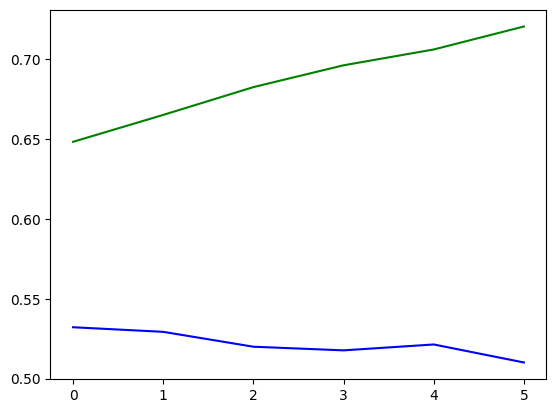

In [40]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color='green', label='Train Data')
plt.plot(history.history['val_accuracy'], color='blue', label='Validation Data')

In [41]:
from sklearn.metrics import confusion_matrix, classification_report


In [42]:
y_pred_probs = model.predict(test_X)       # احتمالات خروجی
y_pred_class = y_pred_probs.argmax(axis=1) # انتخاب کلاس با بیشترین احتمال


577/577 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step


In [43]:
print(confusion_matrix(test_y, y_pred_class))


[[5642 4575]
 [4051 4171]]


In [44]:
print(classification_report(test_y, y_pred_class))

              precision    recall  f1-score   support

         0.0       0.58      0.55      0.57     10217
         1.0       0.48      0.51      0.49      8222

    accuracy                           0.53     18439
   macro avg       0.53      0.53      0.53     18439
weighted avg       0.54      0.53      0.53     18439

